# Clasificacion Basica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

In [16]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [17]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

* ¿Cuántas imagenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [19]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [20]:
train_images[0].reshape(-1).shape

(784,)

In [21]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

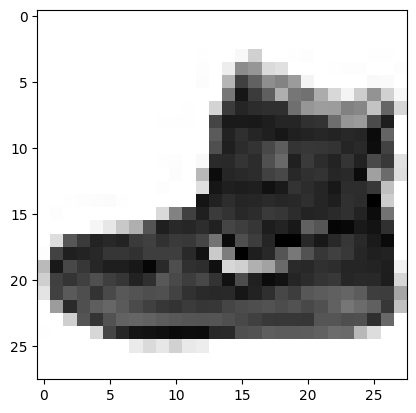

In [22]:
plt.imshow(train_images[0], cmap='Greys')

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [23]:
train_images.min()

0

In [24]:
X_train = train_images.copy() / 255
X_test = test_images.copy() / 255

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

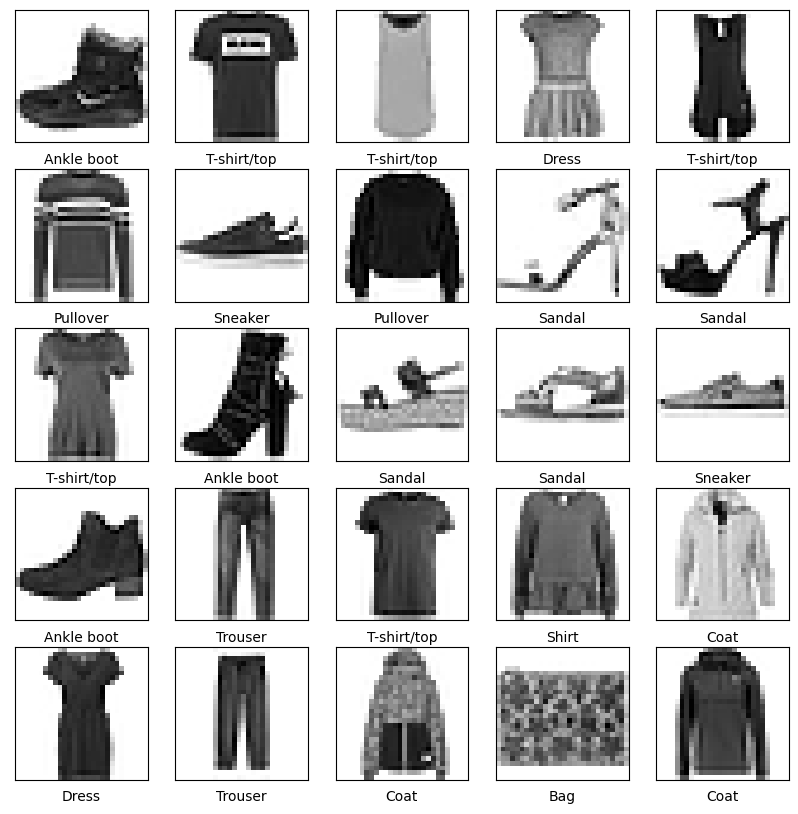

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [45]:
model = keras.models.Sequential(
        [keras.layers.Flatten(input_shape=(28, 28)),
         keras.layers.Dense(300, activation='relu'),
         keras.layers.Dense(100, activation='relu'),
         keras.layers.Dense(10, activation='softmax')]
)


In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.

Prueba en el posterior entrenamiento varios optimizadores.

Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [47]:
model.compile(loss='sparse_categorical_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=.001),
                metrics=['sparse_categorical_accuracy'])

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [48]:
history = model.fit(
    X_train,
    train_labels,
    batch_size=64, # numero de muestras empleadas en el entrenamiento de SGD
    epochs=100, # 1 por defecto. Insuficiente. Numero de vueltas del backpropagation
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    # En vez de validation data podemos usar el argumento validation_split=0.1
    validation_split=0.17
)

Epoch 1/100
779/779 [==============================] - 3s 3ms/step - loss: 1.7129 - sparse_categorical_accuracy: 0.4819 - val_loss: 1.3071 - val_sparse_categorical_accuracy: 0.6646
Epoch 2/100
779/779 [==============================] - 2s 2ms/step - loss: 1.1216 - sparse_categorical_accuracy: 0.6857 - val_loss: 0.9835 - val_sparse_categorical_accuracy: 0.7049
Epoch 3/100
779/779 [==============================] - 2s 2ms/step - loss: 0.9095 - sparse_categorical_accuracy: 0.7166 - val_loss: 0.8459 - val_sparse_categorical_accuracy: 0.7326
Epoch 4/100
779/779 [==============================] - 2s 2ms/step - loss: 0.8077 - sparse_categorical_accuracy: 0.7423 - val_loss: 0.7719 - val_sparse_categorical_accuracy: 0.7507
Epoch 5/100
779/779 [==============================] - 2s 3ms/step - loss: 0.7450 - sparse_categorical_accuracy: 0.7612 - val_loss: 0.7220 - val_sparse_categorical_accuracy: 0.7675
Epoch 6/100
779/779 [==============================] - 2s 2ms/step - loss: 0.7007 - sparse_cate

In [43]:
import pandas as pd

<AxesSubplot: >

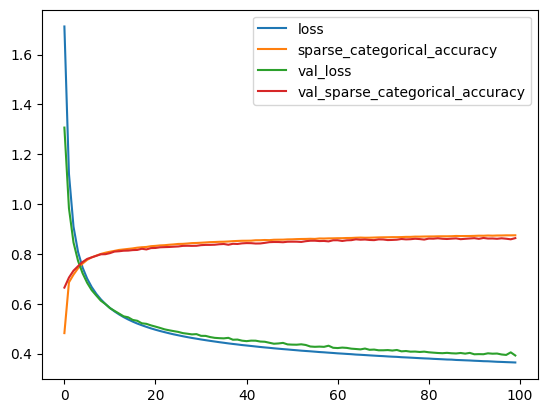

In [49]:
pd.DataFrame(history.history).plot()

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [50]:
loss, acc = model.evaluate(X_test, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4115 - sparse_categorical_accuracy: 0.8544


In [51]:
print(f"TEST LOSS:{loss:.4f}")
print(f"TEST ACCURACY:{acc:.4f}")

TEST LOSS:0.4115
TEST ACCURACY:0.8544


## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [52]:
predictions = model.predict(X_test)

313/313 [==============================] - 4s 2ms/step


El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [54]:
print(predictions[0])

[2.3468026e-05 9.9730585e-07 8.6578175e-06 5.6504678e-06 3.4733389e-06
 1.0420963e-01 1.9562322e-05 1.8354587e-01 1.6153721e-03 7.1056730e-01]


*una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [56]:
idx = np.argmax(predictions[0])
idx

9

In [57]:
class_names[idx]

'Ankle boot'

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificaion es correcta:

In [58]:
test_labels[0]

9

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

In [60]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

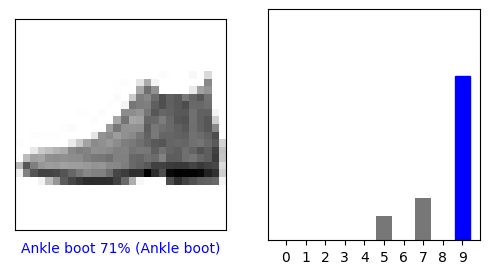

In [61]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

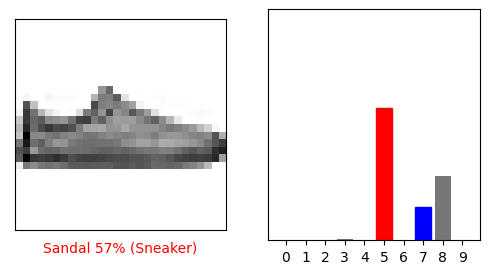

In [62]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

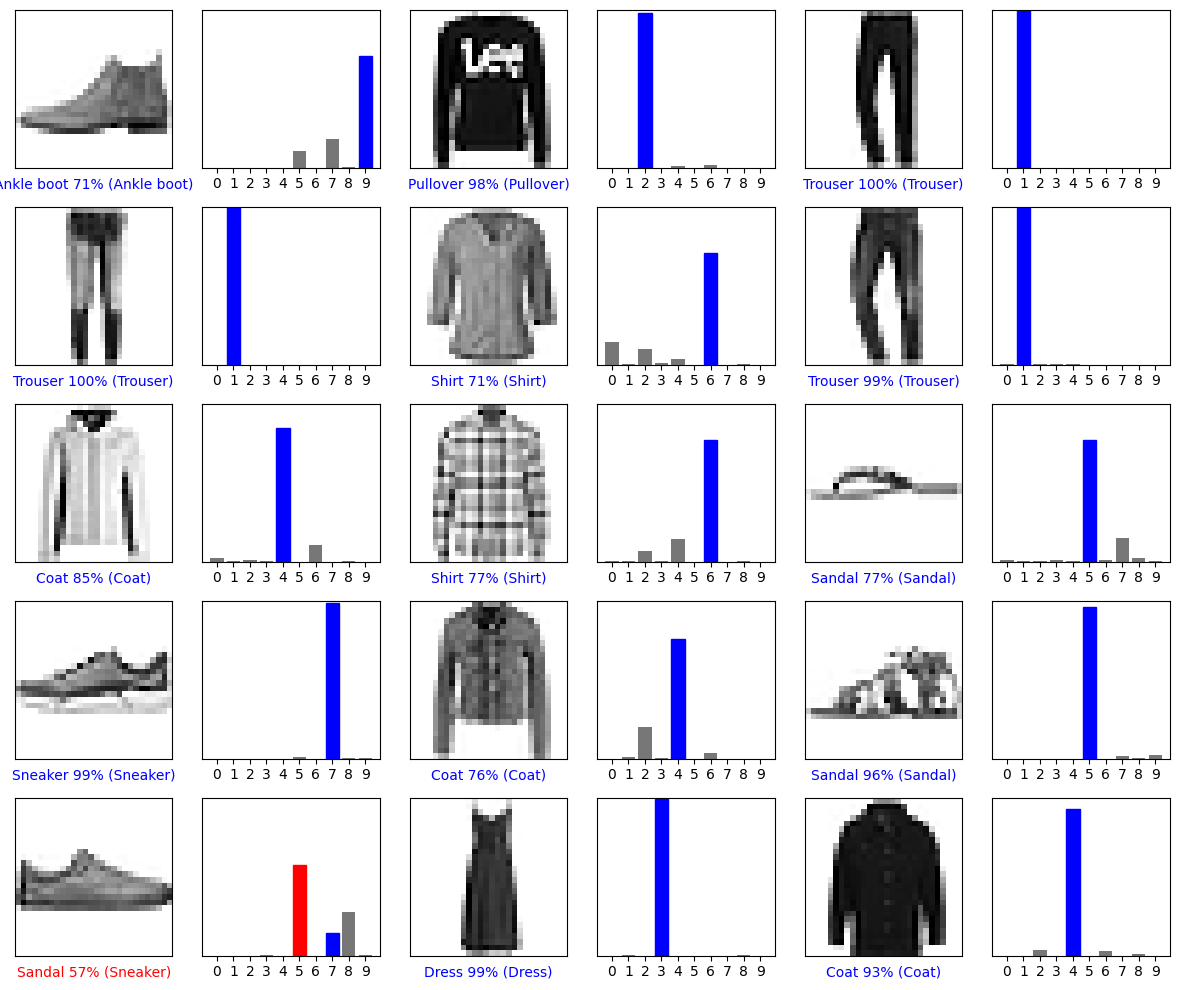

In [63]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [65]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


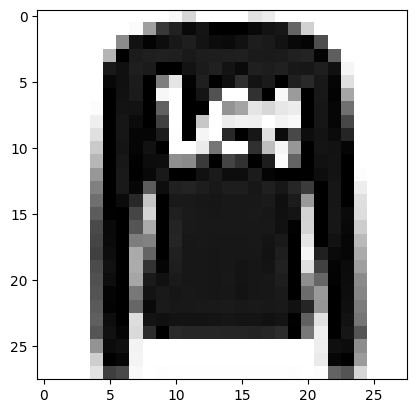

In [66]:
plt.imshow(img, cmap='Greys')

Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, 
o coleciones de ejemplos por vez.
De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [68]:
# Add the image to a batch where it's the only member.
# img = (np.expand_dims(img,0))

# print(img.shape)

Ahora prediga la etiqueta correcta para esta imagen:

In [72]:
predictions_single = model.predict(img / 255)

print(predictions_single)

1/1 [==============================] - 0s 27ms/step
[[1.4594215e-04 1.0818794e-06 9.7779113e-01 5.5463029e-06 7.4227899e-03
  4.2107329e-12 1.4622956e-02 3.6779084e-13 1.0609323e-05 5.2769344e-11]]


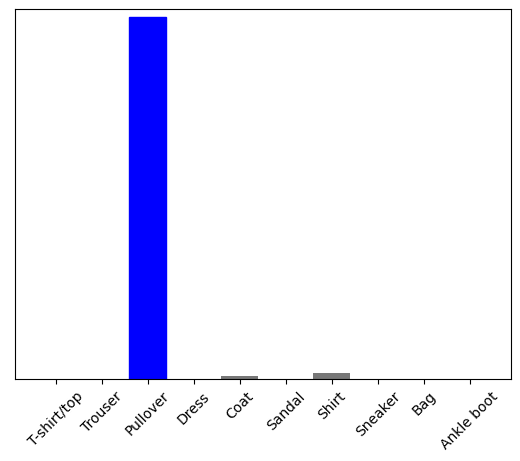

In [73]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del *batch* o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del *batch* o bloque:

In [74]:
np.argmax(predictions_single[0])

2

Y el modelo predice una etiqueta de 2.

In [79]:
predictions.argmax(axis=1)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

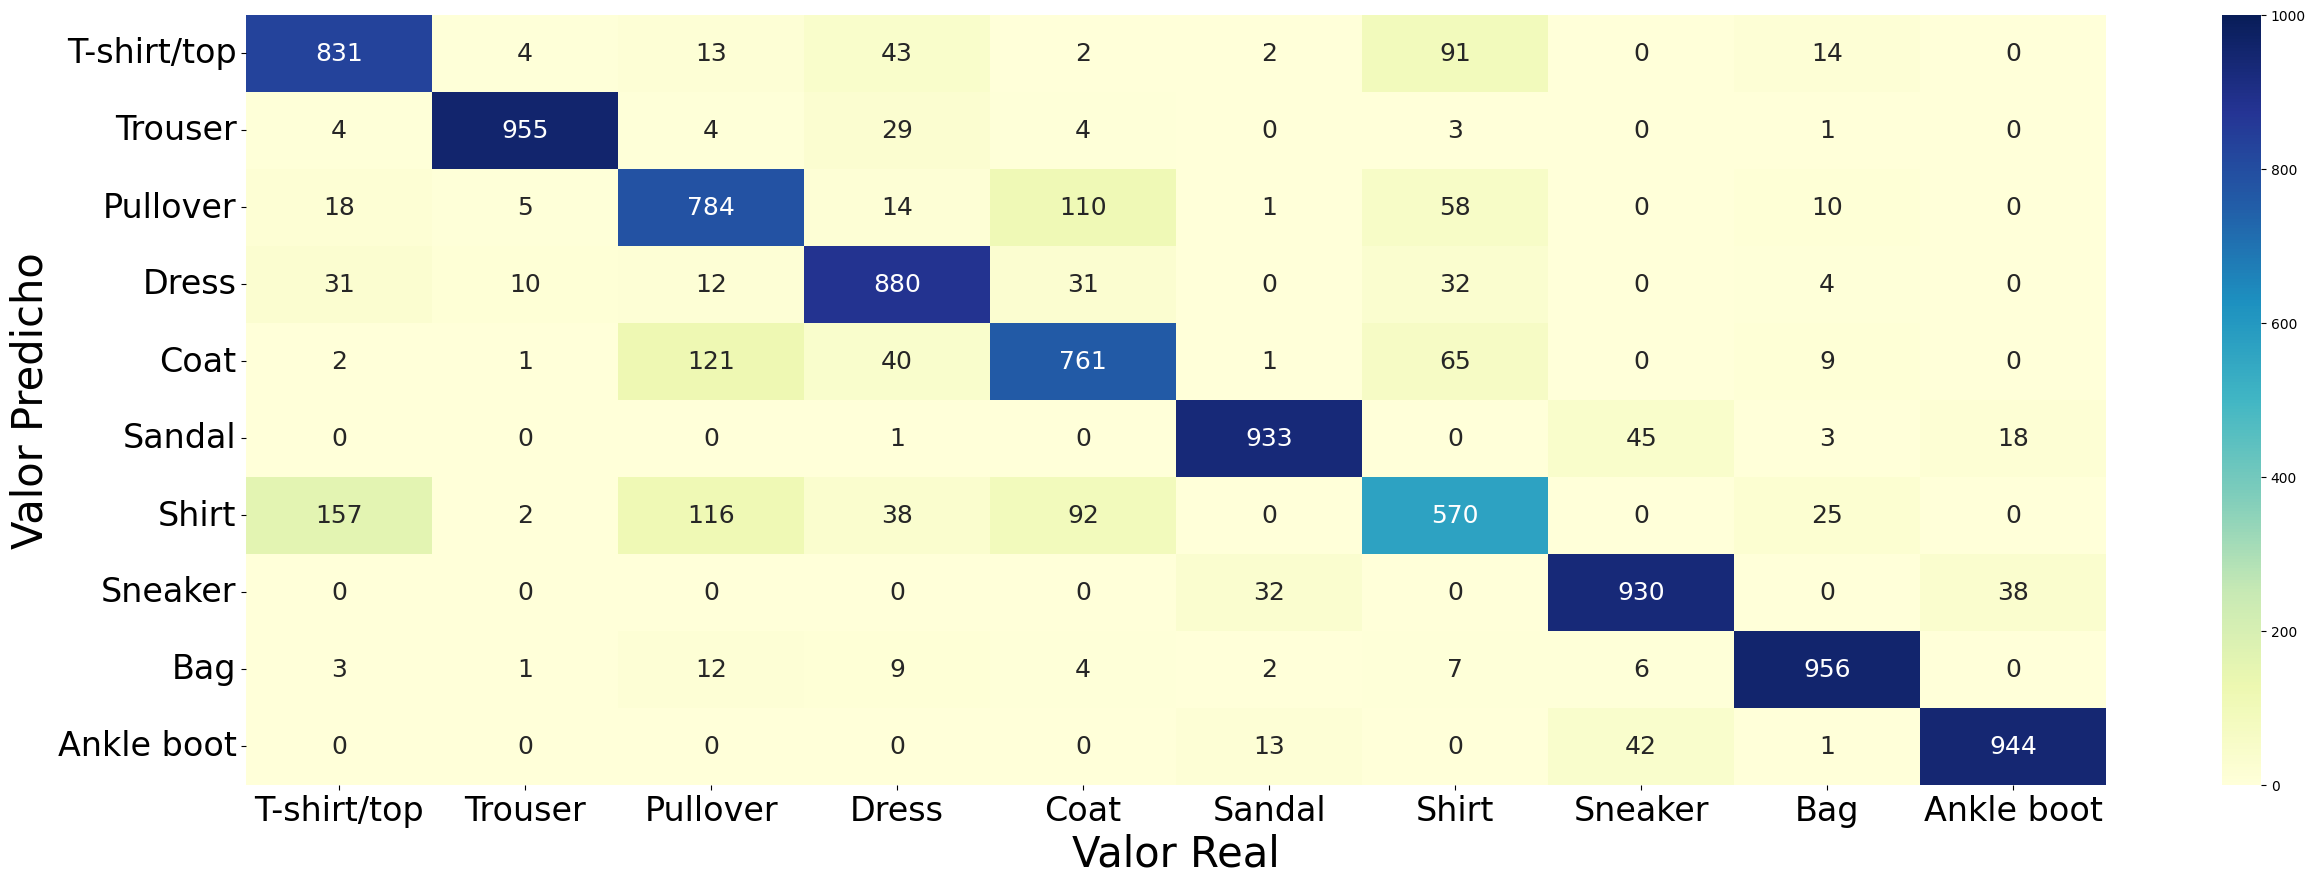

In [87]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
conf_mat = pd.DataFrame(conf_mat, columns=class_names, index=class_names)

plt.figure(figsize=(30, 10))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 18}, fmt='.0f', vmin=0, vmax=1000, cmap='YlGnBu')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24, rotation=0)

plt.xlabel('Valor Real', fontsize=30)
plt.ylabel('Valor Predicho', fontsize=30);